# Suport Vector Machine

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
%matplotlib inline

from sklearn.svm import SVC #import support vector machine classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [3]:
import src.data_set_image_manip
from src.data import Data 
from src.plothelp import *

In [4]:
data = Data("img")
data.load_pickle("100x100.pickle")
X_train, X_test, y_train, y_test = data.train_test_split()

In [7]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [14]:
classifier = SVC()
start = time.time()
classifier.fit(X_train,y_train)
end = time.time()
elapsed = end - start
print("Classifier trained in ", elapsed, "seconds")

Classifier trained in  1176.3441007137299 seconds


In [ ]:
y =classifier.predict(X_test)
accuracy = accuracy_score(y, y_test)

Confusion matrix, without normalization
[[  0   0   0   0]
 [  0   0   0   0]
 [139 127 131 125]
 [  0   0   0   0]]


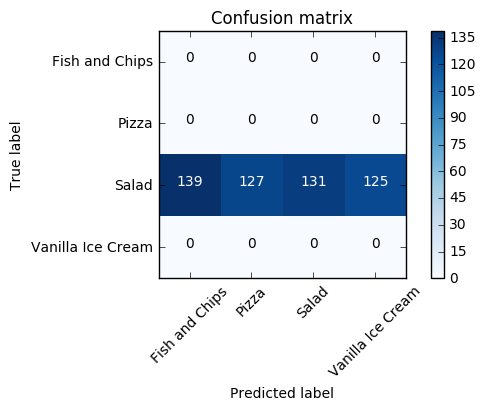

In [30]:
matrix = confusion_matrix(y,y_test)
plot_confusion_matrix(matrix,classifier.classes_)

In [16]:
X_train, _, y_train, _ = data.train_test_split(0.9)
X_train = np.asarray(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], -1))


In [17]:
print(X_train.shape, X_test.shape)

(522, 30000) (522, 30000)


In [32]:
clf = SVC(C=10)
start = time.time()
clf.fit(X_train,y_train)
end = time.time()
elapsed = end - start
print("Classifier trained in ", elapsed, "seconds")

Classifier trained in  15.80328631401062 seconds


In [35]:
y =clf.predict(X_train)
print(accuracy_score(y, y_test))

0.264367816092


Confusion matrix, without normalization
[[37 33 26 28]
 [26 34 26 30]
 [43 34 41 41]
 [33 26 38 26]]


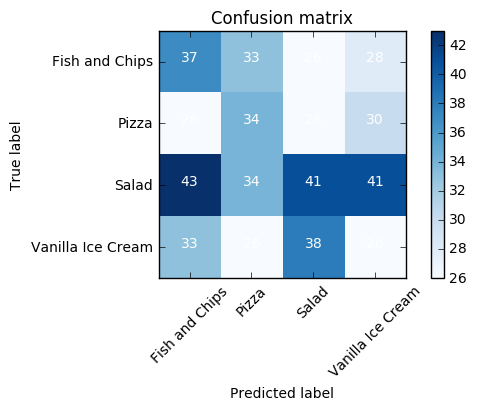

In [36]:
matrix = confusion_matrix(y,y_test)
plot_confusion_matrix(matrix,clf.classes_)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y, y_test))
print(accuracy_score(y, y_test))

                   precision    recall  f1-score   support

   Fish and Chips       0.27      0.30      0.28       124
            Pizza       0.27      0.29      0.28       116
            Salad       0.31      0.26      0.28       159
Vanilla Ice Cream       0.21      0.21      0.21       123

      avg / total       0.27      0.26      0.26       522

0.264367816092


In [40]:
start = time.time()

param_grid = {'C': [10, 100, 1000, 5000, 10000],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_jobs=4)
clf = clf.fit(X_train, y_train)

end = time.time()
elapsed = end - start
print("Classifier trained in ", elapsed, "seconds")
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Classifier trained in  828.5423610210419 seconds
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## Run the best SVM on full data

In [7]:
X_train, X_test, y_train, y_test = data.train_test_split()
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [8]:
X_train.shape

(4698, 30000)

In [14]:
clf = SVC( gamma=0.0001,C =10,class_weight='balanced',verbose=True)
start = time.time()
clf.fit(X_train,y_train)
end = time.time()
elapsed = end - start


print("Classifier trained in ", elapsed, "seconds")

[LibSVM]Classifier trained in  1256.5061140060425 seconds


In [15]:
y =clf.predict(X_test)
print(accuracy_score(y, y_test))


0.250957854406


Confusion matrix, without normalization
[[  0   0   0   0]
 [  0   0   0   0]
 [139 127 131 125]
 [  0   0   0   0]]


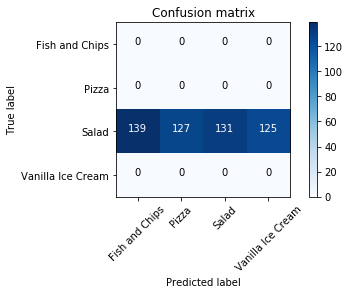

In [16]:
matrix = confusion_matrix(y,y_test)
plot_confusion_matrix(matrix,clf.classes_)

In [17]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)>